# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first import the libraries that we are going to use. One of the most important for this particular portfolio is the sklearn.metrics. This in fact we enable us to calculate a distance between data points.

In [11]:
#importing appropriate libraries

import random
import numpy as np 
import seaborn as sns
import pandas as pd 
from sklearn.metrics import pairwise_distances_argmin
from matplotlib import pyplot as plt
from copy import deepcopy
%matplotlib inline

This step shows the creation of the dataset. Points are randomly generated around some fixed centers

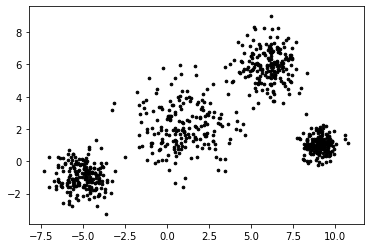

In [12]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

In [15]:
print("The datapoints generated are",data.shape[0],"and the dimensionality is " +str(data.shape[1])+"d")

The datapoints generated are 800 and the dimensionality is 2d


## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

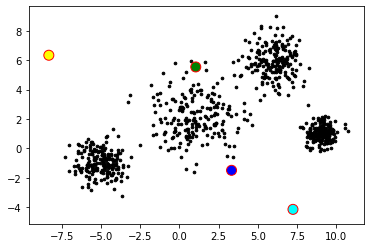

In [16]:
#Set the random seed to 6.
np.random.seed(6)

k=4 #number of clusters

centers = np.random.randn(k,2)*data.std() +data.mean()
plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.scatter(centers[:, 0], centers[:, 1], c=['green','blue','yellow','cyan'], s=100,edgecolors='red');

The scatterplot above shows that the initial data centers are far away from the real data points. In a larger dataset this may lead to some problem of convergence. Usually the initial data centers need to choosen in a smarter way than randomly. This in fact can speed up the algorithm. One famous algorithm that has been largely used is k-means ++ for using the initial values.

## 2. Visualise the clustering results in each iteration

You need to implement the process of k-means clustering.  Implement each iteration as a seperate cell, assigning each data point to the closest centre, then updating the cluster centres based on the data, then plot the new clusters.

First of all, k-means algorithm is quickly defined in the following rows.
The k-means algorithm can be divided into 3 different steps. In the first step, the algorithm arbitrarily selects K data points to be the seeds. The next step gives each record to the closest seed. In other words, the algorithm measures the Euclidian distance of each row to each seed and chooses the minimum distance for this step. The final step computes the centroids of the clusters. The centroids will then be the seeds for the next iteration of the algorithm. Each step is repeated until the cluster boundaries stop changing.

This method sorts the items according to how alike and dislike they are to the other clusters.

In [ ]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor = "r", s = 500)

plt.show()

In [ ]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

df = assignment(df, centroids)

centroids = update(centroids)



fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='r', s = 500)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
plt.show()

print(centroids == old_centroids)

In [ ]:
old_centroids = copy.deepcopy(centroids)
df = assignment(df, centroids)
centroids = update(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor = "r", s = 500)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
plt.show()

print(centroids == old_centroids)

In [ ]:
old_centroids = copy.deepcopy(centroids)
df = assignment(df, centroids)
centroids = update(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor = "r", s = 500)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
plt.show()

print(centroids == old_centroids)

In [ ]:
old_centroids = copy.deepcopy(centroids)
df = assignment(df, centroids)
centroids = update(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor = "r", s = 500)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
plt.show()

print(centroids == old_centroids)